In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb

In [2]:
# Step 1: Load Dataset
df = pd.read_csv("C:\\Users\\Afiya\\Downloads\\creditcard.csv")  # Ensure this file is in the working directory
print("Dataset Loaded Successfully!\n")

# Display first few rows
print(df.head())

Dataset Loaded Successfully!

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

  


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  f

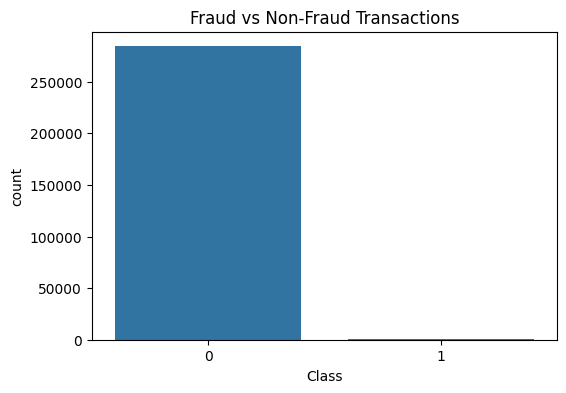


Data Preprocessing Complete!


In [3]:
# Step 2: Data Preprocessing
print("\nDataset Information:")
print(df.info())

# Check fraud distribution
plt.figure(figsize=(6,4))
sns.countplot(x="Class", data=df)  # 'Class' column: 0 = Not Fraud, 1 = Fraud
plt.title("Fraud vs Non-Fraud Transactions")
plt.show()

# Select Features (X) and Target (y)
X = df.drop(columns=['Class'])  # All features except 'Class'
y = df['Class']  # Target column

# Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data (important for ML models)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print("\nData Preprocessing Complete!")

In [4]:
# Step 3: Train Different Models

# Logistic Regression
print("\nTraining Logistic Regression...")
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print("\nLogistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

# Random Forest Classifier
print("\nTraining Random Forest Classifier...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("\nRandom Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# XGBoost Classifier
print("\nTraining XGBoost Classifier...")
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print("\nXGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


Training Logistic Regression...

Logistic Regression Accuracy: 0.9990695551420246
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.56      0.67        98

    accuracy                           1.00     56962
   macro avg       0.92      0.78      0.84     56962
weighted avg       1.00      1.00      1.00     56962


Training Random Forest Classifier...

Random Forest Accuracy: 0.9995611109160493
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.77      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962


Training XGBoost Classifier...


C:\Users\Afiya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:158: UserWarning: [22:22:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Accuracy: 0.9995611109160493
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.78      0.86        98

    accuracy                           1.00     56962
   macro avg       0.98      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962



In [7]:
# Step 4: Save the Best Model
joblib.dump(rf_model, "fraud_detection_model.pkl")  # Saving Random Forest model
joblib.dump(scaler, "scaler.pkl")  # Saving the scaler
print("\nModel Saved Successfully!")


Model Saved Successfully!


In [8]:
# Step 5: Load & Use the Model for Fraud Prediction

# Load the trained model and scaler
loaded_model = joblib.load("fraud_detection_model.pkl")
loaded_scaler = joblib.load("scaler.pkl")

# Example new transaction (30 features)
new_transaction = np.array([[1000, -0.5, 1.2, -2.3, 0.7, 0.4, -1.1, 2.0, -0.9, 0.3,
                              1.5, -0.8, 0.2, 1.1, -1.3, 0.6, -0.7, 1.9, 0.4, -1.2,
                              1.8, -0.3, 0.9, -2.1, 1.6, 0.7, -0.5, 1.2, -0.9, 200]])  # 30 values

# Ensure correct shape before scaling
print("\nNew Transaction Shape:", new_transaction.shape)  # Should be (1, 30)

# Normalize the new transaction
new_transaction_scaled = loaded_scaler.transform(new_transaction)

# Predict fraud or not
prediction = loaded_model.predict(new_transaction_scaled)
print("\nPrediction for New Transaction:", "Fraud Detected" if prediction[0] == 1 else "No Fraud")



New Transaction Shape: (1, 30)

Prediction for New Transaction: No Fraud


C:\Users\Afiya\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


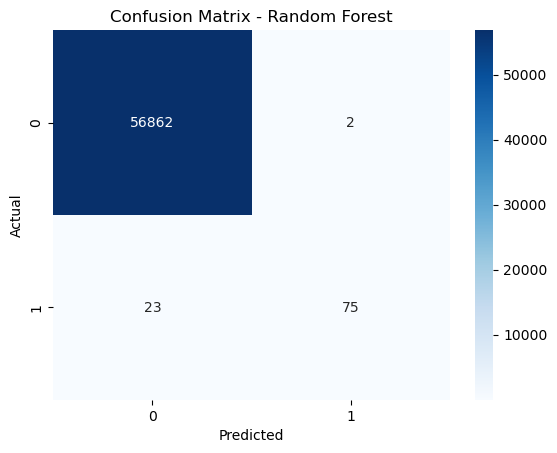

In [9]:
# Step 6: Visualizing Performance
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [5]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))


Logistic Regression Accuracy: 0.9990695551420246
Random Forest Accuracy: 0.9995611109160493
XGBoost Accuracy: 0.9995611109160493


In [7]:
print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.77      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962



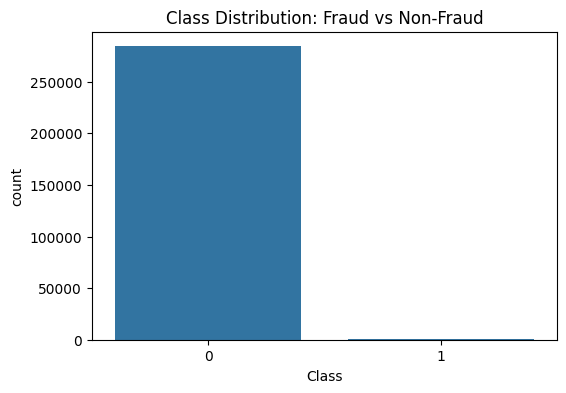

In [8]:
plt.figure(figsize=(6,4))
sns.countplot(x="Class", data=df)  # Fraud vs Legit Transactions
plt.title("Class Distribution: Fraud vs Non-Fraud")
plt.show()


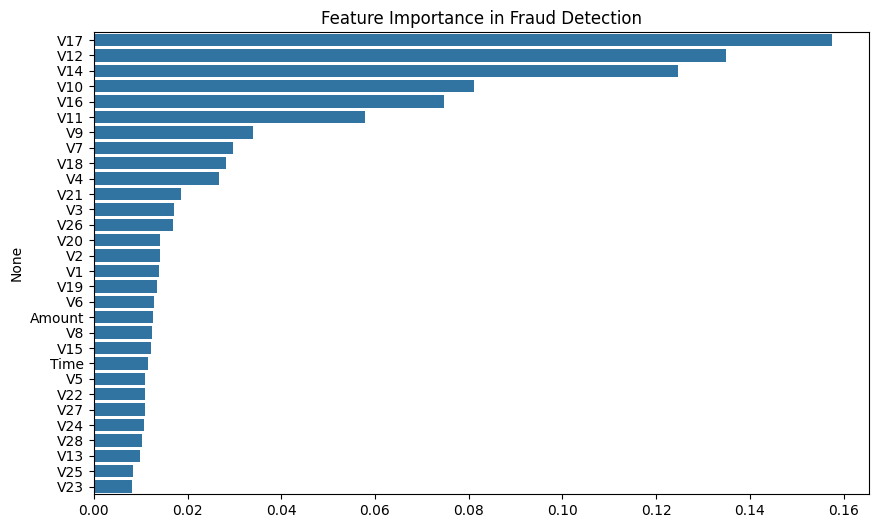

In [9]:
importances = rf_model.feature_importances_
features = X.columns
sorted_indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
sns.barplot(x=importances[sorted_indices], y=features[sorted_indices])
plt.title("Feature Importance in Fraud Detection")
plt.show()


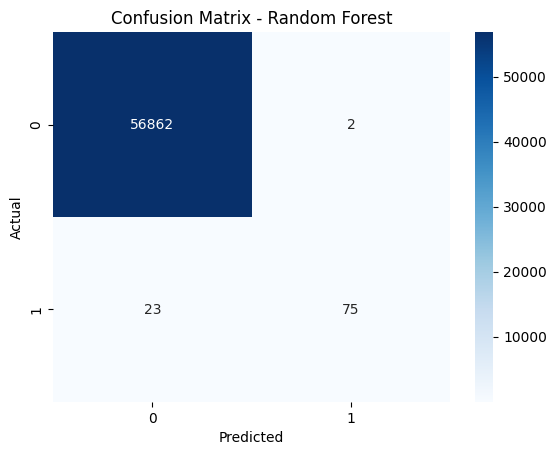

In [10]:
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()
